In [1]:
import matplotlib.pyplot as plt # used to create plots
from matplotlib.pyplot import figure # used to control size of plots
import numpy as np # for creation of arrays
import pandas as pd # for making data frames

In [2]:
def all_data_stats_plot(variable_data, variable_name, stat_name, file_name, save_fig):
                              
    '''
    
    all_data_stats_plot:
    --------------------
    
    Function that plots the statistics for predictions made on the whole data set
    
    Args:
    -----
    
   variable_data: list of statistic values 
   variable_name: model being shown
   stat_name: statistic being used
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot to compare statistics values for each model 
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    plt.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour based on type of model 
    plt.axvspan(3.5, 4.5, facecolor = "lightcyan")
    plt.axvspan(4.5, 6.5, facecolor = "lavender")
    plt.axvspan(6.5, 10.5, facecolor = "blanchedalmond")
            
    plt.scatter(variable_name, variable_data, s = 36, color = "black") # plots points
    
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Model", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 20)
    plt.yticks(fontsize = 20)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [3]:
def all_data_stats_plot_double(var_data1, var_data2, var_name, name1, name2, file_name, save_fig):
                                  
    '''
    
    all_data_stats_plot_double:
    ----------------------------
    
    Function that plots the statistics for predictions made on the whole data set with 2 different y-axes
    
    Args:
    -----
    
   var_data1 + var_data2: list of statistic values for both statistics points
   var_name: model being shown
   name1 + name2: names of both statistics 
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot to compare statistics values for each model using 2 different statistics 
    
    '''
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() # used to plot with different y-axes
    
    ax1.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour based on type of model 
    ax1.axvspan(3.5, 4.5, facecolor = "lightcyan")
    ax1.axvspan(4.5, 6.5, facecolor = "lavender")
    ax1.axvspan(6.5, 10.5, facecolor = "blanchedalmond") 
    
    # plots on both 2 different y-axes
    p1 = ax1.scatter(var_name, var_data1, s = 36, color = "black")
    p2 = ax2.scatter(var_name, var_data2, s = 36, edgecolors = "black", facecolors = "none")
    
    fig.set_figwidth(7.5) # changes size of plot to make results more clear
    fig.set_figheight(6)
    
    ax2.set_ylim(0, 30) # sets limits to axes 
    ax1.set_ylim(10, 90)

    ax1.set_xlabel("Model", fontsize = 20)
    ax1.set_ylabel(name1, fontsize = 20)
    ax2.set_ylabel(name2, fontsize = 20)
    ax1.tick_params(axis = "y", labelsize = 20)
    ax2.tick_params(axis = "y", labelsize = 20)
    ax1.tick_params(axis = "x", rotation = 75, labelsize = 15)
    ax2.tick_params(axis = "x", rotation = 75, labelsize = 15)
    plt.legend([p1, p2], [name1, name2])
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [4]:
def rf_unseen_stats_plot(var_data_cmc, var_data_ln_cmc, variable_name, stat_name, colours, head_group, file_name, 
                         save_fig):
                              
    '''
    
    rf_unseen_stats_plot:
    ---------------------
    
    Function that plots the statistics resulting from the random forest predicting unseen head groups for both
    CMC and ln(CMC).
    
    Args:
    -----
    
   var_data_cmc: list of statistic values from predicting CMC
   var_data_ln_cmc: list of statistic values from predicting ln(CMC)
   variable_name: model being shown
   stat_name: statistic being used
   colours: dictionary of colours based on head group
   head_group: list of head groups
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot to compare statistics values for predictions of each head group 
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    # plots results for initial random forest model 
    cmc_line = [var_data_cmc[-1] for i in range(len(head_group))]
    ln_cmc_line = [var_data_ln_cmc[-1] for i in range(len(head_group))]
    plt.plot(head_group, cmc_line, color = "black", label = "CMC")
    plt.plot(head_group, ln_cmc_line, color = "black", linestyle = ":", label = "ln(CMC)")
    
    for ind, hg in enumerate(head_group): # for each head group, finds stats value for predicting CMC and ln(CMC)
        curr_cmc = var_data_cmc[ind]
        curr_ln_cmc = var_data_ln_cmc[ind]
        
        plt.scatter(hg, curr_cmc, s = 36, c = colours[hg], label = hg)
        plt.scatter(hg, curr_ln_cmc, s = 36, c = colours[hg], label = hg, marker = "v")
    
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Head Group", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 20)
    plt.yticks(fontsize = 20)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [5]:
def rf_unseen_stats_plot_double(var_data_cmc1, var_data_ln_cmc1, var_data_cmc2, var_data_ln_cmc2, variable_name, 
                                name1, name2, colours, head_group, file_name, save_fig):
                              
    '''
    
    rf_unseen_stats_plot_double:
    -----------------------------
    
    Function that plots 2 statistics resulting from the random forest predicting unseen head groups for both
    CMC and ln(CMC) on the same graph
    
    Args:
    -----
    
   var_data_cmc1: list of 1st statistic values from predicting CMC
   var_data_ln_cmc1: list of 1st statistic values from predicting ln(CMC)
   var_data_cmc2: list of 2nd statistic values from predicting CMC
   var_data_ln_cmc2: list of 2nd statistic values from predicting ln(CMC)
   variable_name: model being shown
   name1 + name2: names of statistics being used
   colours: dictionary of colours for each head group
   head_group: list of head groups to plot
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved 
    
    Returns:
    --------
    
    plot to compare statistics values for predictions of each head group using 2 different statistics 
    
    '''
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    fig.set_figwidth(7.5)
    fig.set_figheight(6)
    
    # plots CMC and ln(CMC) predictions as well as value for all data 
    cmc_line1 = [var_data_cmc1[-1] for i in range(len(head_group))]
    ln_cmc_line1 = [var_data_ln_cmc1[-1] for i in range(len(head_group))]
    p1 = ax1.scatter(head_group, cmc_line1, s = 20, color = "black", label = "CMC")
    p2 = ax1.scatter(head_group, ln_cmc_line1, s = 20, color = "black", marker = "v", label = "ln(CMC)")
    
    cmc_line2 = [var_data_cmc2[-1] for i in range(len(head_group))]
    ln_cmc_line2 = [var_data_ln_cmc2[-1] for i in range(len(head_group))]
    p3 = ax2.scatter(head_group, cmc_line2, s = 20, edgecolors = "black", facecolors = "none", label = "CMC")
    p4 = ax2.scatter(head_group, ln_cmc_line2, s = 20, edgecolors = "black", facecolors = "none", marker = "v", 
                     label = "ln(CMC)")
    
    for ind, hg in enumerate(head_group): # for each head group, finds stats value for predicting CMC and ln(CMC)
        curr_cmc1 = var_data_cmc1[ind]
        curr_ln_cmc1 = var_data_ln_cmc1[ind]
        curr_cmc2 = var_data_cmc2[ind]
        curr_ln_cmc2 = var_data_ln_cmc2[ind]
    
        # plots on different y-axes
        ax1.scatter(hg, curr_cmc1, s = 36, c = colours[hg])
        ax1.scatter(hg, curr_ln_cmc1, s = 36, c = colours[hg], marker = "v")
        ax2.scatter(hg, curr_cmc2, s = 36, edgecolors = colours[hg], facecolors = "none")
        ax2.scatter(hg, curr_ln_cmc2, s = 36, edgecolors = colours[hg], facecolors = "none", marker = "v")
    
    ax1.set_ylim(-5, 100)
    
    ax1.set_xlabel("Head Group", fontsize = 20)
    ax1.set_ylabel(name1, fontsize = 20)
    ax2.set_ylabel(name2, fontsize = 20)
    ax1.tick_params(axis = "y", labelsize = 20)
    ax2.tick_params(axis = "y", labelsize = 20)
    ax1.tick_params(axis = "x", rotation = 65, labelsize = 16)
    ax2.tick_params(axis = "x", rotation = 65, labelsize = 16)
    plt.legend([p1, p2, p3, p4], ["CMC: " + name1, "ln(CMC): " + name1, "CMC: " + name2, "ln(CMC): " + name2])
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [6]:
def rf_unseen_stats_plot_compare(var_data_cmc, var_data_ln_cmc, variable_data, variable_name, stat_name, colours, 
                                 head_group, file_name, save_fig):
                              
    '''
    
    rf_unseen_stats_plot:
    ---------------------
    
    Function that plots the statistics resulting from the random forest predicting unseen head groups for both
    CMC and ln(CMC)
    
    Args:
    -----
    
   var_data_cmc: list of statistic values from predicting CMC
   var_data_ln_cmc: list of statistic values from predicting ln(CMC)
   variable_data: statistics from other predictions
   variable_name: model being shown
   stat_name: statistic being used
   colours: dictionary of colours based on head group
   head_group: list of head groups
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot to compare statistics values for predictions of each head group 
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    plt.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour based on type of model 
    plt.axvspan(3.5, 4.5, facecolor = "lightcyan")
    plt.axvspan(4.5, 8.5, facecolor = "lavender")
    
    # plots all other points for predicting with all data to compare
    plt.scatter(variable_name[:-2], variable_data, s = 36, color = "black")
    
    for ind, hg in enumerate(head_group): # for each head group, finds stats value for predicting CMC and ln(CMC)
        curr_cmc = var_data_cmc[ind]
        curr_ln_cmc = var_data_ln_cmc[ind]
        
        x1 = variable_name[-2] # finds the statistics value for each head group
        x2 = variable_name[-1]
        plt.scatter(x1, curr_cmc, s = 36, c = colours[hg], label = hg)
        plt.scatter(x2, curr_ln_cmc, s = 36, c = colours[hg], label = hg)
    
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Head Group", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 20)
    plt.yticks(fontsize = 20)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [7]:
def calc_per_diff(val1, val2):
                                  
    '''
    
    calc_per_diff:
    --------------
    
    Function that calculates the percentage change between 2 values and says whether it was a percentage increase
    or decrease
    
    Args:
    -----
    
   val1: initial value to compare to 
   val2: new value to find out if this is a percentage increase or decrease compared to val1
    
    
    Returns:
    --------
    
    print statement to give percentage change and whether it was an increase or decrease
    
    '''
       
    
    if val2 > val1: # % increase if new value is bigger
        inc = val2 - val1 # calculates change
        per_inc = (inc / val1) * 100
        print("Val2 shows % increase = ", round(per_inc, 2))
    elif val2 < val1: # % decrease if new value is smaller
        dec = val1 - val2 # calculates change
        per_dec = (dec / val1) * 100
        print("Val2 shows % decrease = ", round(per_dec, 2))
    
    return

In [8]:
# dictionary of colours for plotting each head group
colours = {"CO2Na" : "steelblue", "NH3Cl" : "orange", "NMe3Br" : "green", "OSO3Na" : "red", 
           "SO3Na" : "mediumorchid", "PyBr" : "navy", "Ethoxylates" : "pink", "Carboxylic Acid" : "gray",
          "NMe2NBzCl" : "darkseagreen", "SO3H" : "peru", "NH3Ac" : "magenta"}

### Models that predict with all data

In [16]:
model_name_all = ["Lin Reg: cLen", "Lin Reg: logP", "Lin Reg: MW", "Lin Reg: NVE", 
                  "Multi Lin Reg: All", "RF: CMC", "RF: ln(CMC)", 
                  "LMM (no corr/ethoxy)", "LMM", "LMM (no ethoxy)"]

In [10]:
# stats values for all models in same order as model name list shown above
RMSE_all = [68.19, 58.01, 66.41, 66.43, 47.08, 38.58, 38.21, 34.39, 40.66, 13.37]
co_det_all = [0.0, 0.21, 0.03, 0.03, 0.47, 0.61, 0.63, 0.74, 0.62, 0.96]
MAE_all = [27.12, 22.67, 25.52, 25.49, 18.53, 15.9, 14.45, 16.17, 13.69, 6.06]

***Calculates percentage change between multi-linear regression and random forest***

In [11]:
print("Multi-linear regression all compared to random forest CMC:")
print("RMSE")
calc_per_diff(RMSE_all[4], RMSE_all[5])
print("Co det")
calc_per_diff(co_det_all[4], co_det_all[5])
print("MAE")
calc_per_diff(MAE_all[4], MAE_all[5])

print("Multi-linear regression all compared to random forest ln(CMC):")
print("RMSE")
calc_per_diff(RMSE_all[4], RMSE_all[6])
print("Co det")
calc_per_diff(co_det_all[4], co_det_all[6])
print("MAE")
calc_per_diff(MAE_all[4], MAE_all[6])

Multi-linear regression all compared to random forest CMC:
RMSE
Val2 shows % decrease =  18.05
Co det
Val2 shows % increase =  29.79
MAE
Val2 shows % decrease =  14.19
Multi-linear regression all compared to random forest ln(CMC):
RMSE
Val2 shows % decrease =  18.84
Co det
Val2 shows % increase =  34.04
MAE
Val2 shows % decrease =  22.02


***Calculates percentage change between different random forest models***

In [12]:
print("Different descriptors in random forest CMC:")
print("RMSE")
calc_per_diff(RMSE_all[5], 42.30)
print("Co det")
calc_per_diff(co_det_all[5], 0.57)
print("MAE")
calc_per_diff(MAE_all[5], 17.82)

print("Multi-linear regression all compared to random forest ln(CMC):")
print("RMSE")
calc_per_diff(RMSE_all[6], 37.78)
print("Co det")
calc_per_diff(co_det_all[6], 0.67)
print("MAE")
calc_per_diff(MAE_all[6], 14.12)

Different descriptors in random forest CMC:
RMSE
Val2 shows % increase =  9.64
Co det
Val2 shows % decrease =  6.56
MAE
Val2 shows % increase =  12.08
Multi-linear regression all compared to random forest ln(CMC):
RMSE
Val2 shows % decrease =  1.13
Co det
Val2 shows % increase =  6.35
MAE
Val2 shows % decrease =  2.28


In [13]:
print("Other different descriptors in random forest CMC:")
print("RMSE")
calc_per_diff(RMSE_all[5], 38.56)
print("Co det")
calc_per_diff(co_det_all[5], 0.62)
print("MAE")
calc_per_diff(MAE_all[5], 15.57)

print("Multi-linear regression all compared to random forest ln(CMC):")
print("RMSE")
calc_per_diff(RMSE_all[6], 40.23)
print("Co det")
calc_per_diff(co_det_all[6], 0.61)
print("MAE")
calc_per_diff(MAE_all[6], 15.05)

Other different descriptors in random forest CMC:
RMSE
Val2 shows % decrease =  0.05
Co det
Val2 shows % increase =  1.64
MAE
Val2 shows % decrease =  2.08
Multi-linear regression all compared to random forest ln(CMC):
RMSE
Val2 shows % increase =  5.29
Co det
Val2 shows % decrease =  3.17
MAE
Val2 shows % increase =  4.15


***Calculates percentage change between linear mixed models and random forest***

In [14]:
print("LMM (no corr) compared to random forest ln(CMC) prediction:")
print("RMSE")
calc_per_diff(RMSE_all[-5], RMSE_all[-4])
print("Co det")
calc_per_diff(co_det_all[-5], co_det_all[-4])
print("MAE")
calc_per_diff(MAE_all[-5], MAE_all[-4])
print("\n")

print("LMM (no corr, no ethoxy) compared to random forest ln(CMC) prediction:")
print("RMSE")
calc_per_diff(RMSE_all[-5], RMSE_all[-3])
print("Co det")
calc_per_diff(co_det_all[-5], co_det_all[-3])
print("MAE")
calc_per_diff(MAE_all[-5], MAE_all[-3])
print("\n")

print("LMM compared to random forest ln(CMC) prediction:")
print("RMSE")
calc_per_diff(RMSE_all[-5], RMSE_all[-2])
print("Co det")
calc_per_diff(co_det_all[-5], co_det_all[-2])
print("MAE")
calc_per_diff(MAE_all[-5], MAE_all[-2])
print("\n")

print("LMM (no ethoxy) compared to random forest ln(CMC) prediction:")
print("RMSE")
calc_per_diff(RMSE_all[-5], RMSE_all[-1])
print("Co det")
calc_per_diff(co_det_all[-5], co_det_all[-1])
print("MAE")
calc_per_diff(MAE_all[-5], MAE_all[-1])
print("\n")

LMM (no corr) compared to random forest ln(CMC) prediction:
RMSE
Val2 shows % decrease =  0.96
Co det
Val2 shows % increase =  3.28
MAE
Val2 shows % decrease =  9.12


LMM (no corr, no ethoxy) compared to random forest ln(CMC) prediction:
RMSE
Val2 shows % decrease =  10.86
Co det
Val2 shows % increase =  21.31
MAE
Val2 shows % increase =  1.7


LMM compared to random forest ln(CMC) prediction:
RMSE
Val2 shows % increase =  5.39
Co det
Val2 shows % increase =  1.64
MAE
Val2 shows % decrease =  13.9


LMM (no ethoxy) compared to random forest ln(CMC) prediction:
RMSE
Val2 shows % decrease =  65.34
Co det
Val2 shows % increase =  57.38
MAE
Val2 shows % decrease =  61.89




### Comparing stats plots

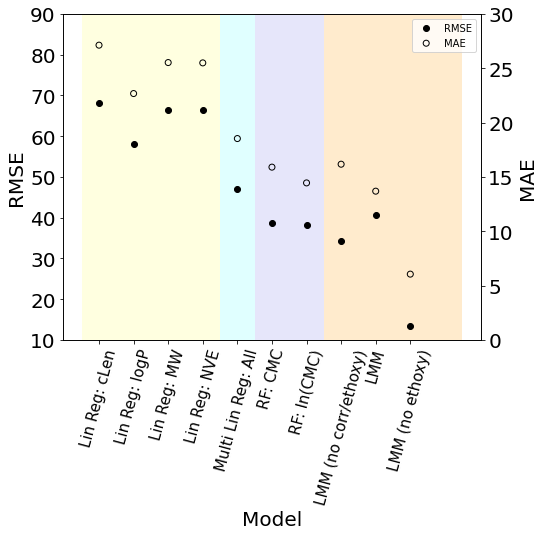

In [17]:
all_data_stats_plot_double(RMSE_all, MAE_all, model_name_all, "RMSE", "MAE", "RMSE_MAE_pred_all.png", False)

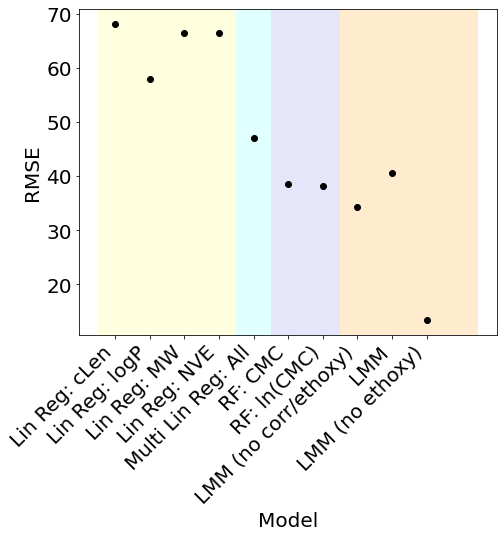

In [18]:
all_data_stats_plot(RMSE_all, model_name_all, "RMSE", "RMSE_pred_all_lmm.png", False)

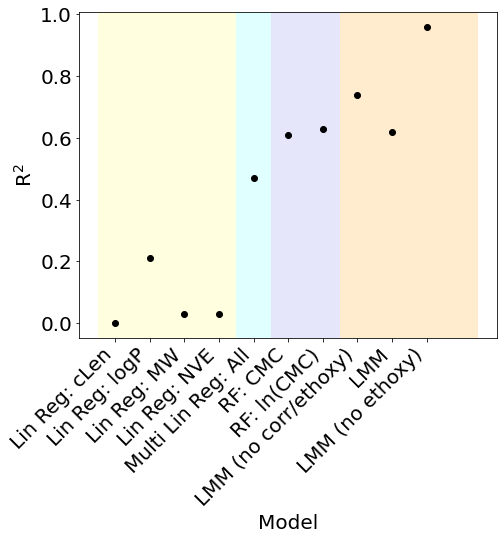

In [19]:
all_data_stats_plot(co_det_all, model_name_all, "R$^{2}$", "co_det_pred_all_lmm.png", False)

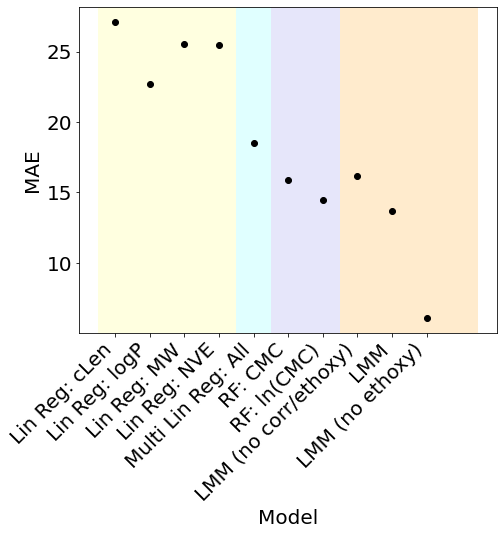

In [20]:
all_data_stats_plot(MAE_all, model_name_all, "MAE", "MAE_pred_all_lmm.png", False)

### Comparing stats plot for random forest predicting unseen head groups

In [19]:
# list of head groups
head_group = ["CO2Na", "NH3Cl", "NMe3Br", "OSO3Na", "SO3Na", "PyBr", "Ethoxylates", "Carboxylic Acid", 
              "NMe2NBzCl", "SO3H", "NH3Ac"]

In [20]:
# stats values for all models in same order as head group list shown above
RMSE_cmc = [57.65, 20.90, 82.01, 17.17, 8.04, 36.78, 39.53, 59.14, 24.58, 1.07, 27.80, 38.58]
RMSE_ln_cmc = [52.56, 2.25, 92.85, 23.05, 13.60, 53.48, 28.96, 57.77, 24.76, 0.81, 1.11, 38.21]

co_det_cmc = [0.79, 0.0, 0.25, 0.94, 0.95, 0.71, 0.0, 0.79, 0.0, 0.0, 0.0, 0.61]
co_det_ln_cmc = [0.82, 0.99, 0.04, 0.89, 0.87, 0.38, 0.0, 0.77, 0.0, 0.22, 0.44, 0.63]

MAE_cmc = [41.77, 15.4, 39.86, 8.41, 5.39, 25.03, 23.36, 34.65, 13.62, 1.02, 20.13, 15.90]
MAE_ln_cmc = [34.80, 1.48, 48.03, 10.30, 6.43, 34.07, 9.53, 36.18, 13.64, 0.64, 6.72, 14.45]

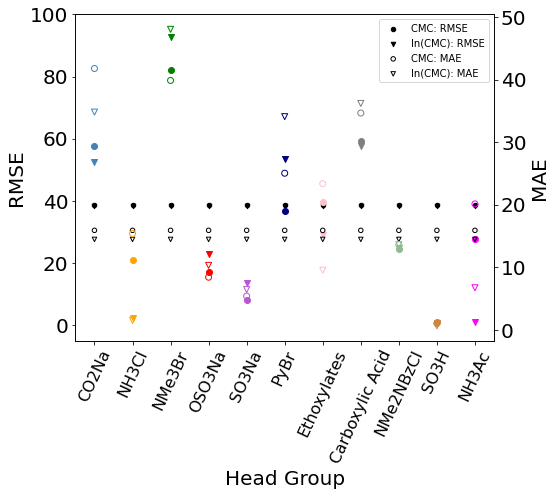

In [21]:
rf_unseen_stats_plot_double(RMSE_cmc, RMSE_ln_cmc, MAE_cmc, MAE_ln_cmc, head_group, "RMSE", "MAE", colours, 
                            head_group, "RMSE_MAE_rf_pred_unseen.png", False)

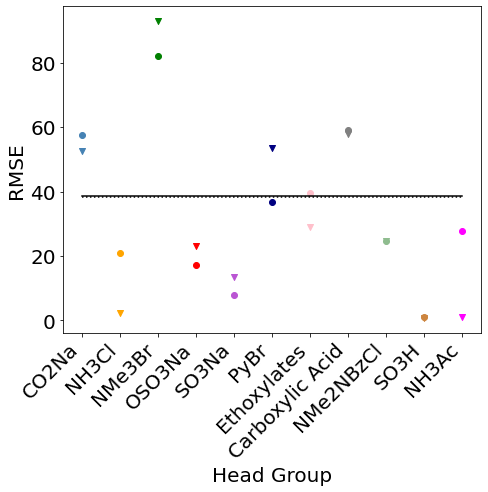

In [22]:
rf_unseen_stats_plot(RMSE_cmc, RMSE_ln_cmc, head_group, "RMSE", colours, head_group, "RMSE_rf_pred_unseen.png", 
                     False)

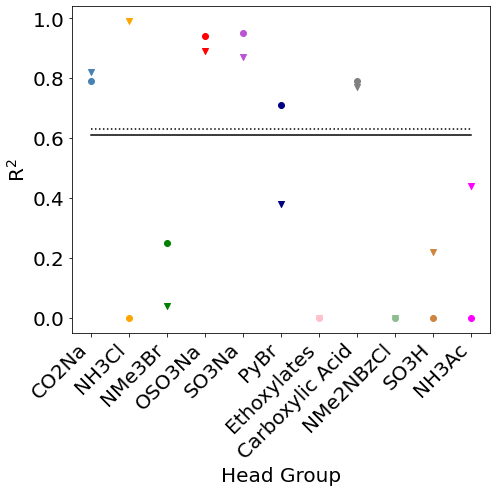

In [23]:
rf_unseen_stats_plot(co_det_cmc, co_det_ln_cmc, head_group, "R$^{2}$", colours, head_group, 
                     "co_det_rf_pred_unseen.png", False)

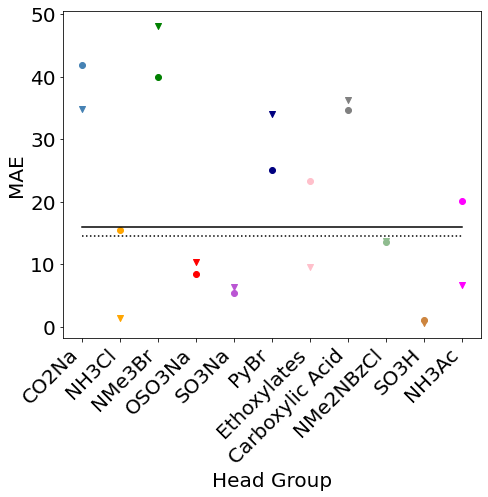

In [24]:
rf_unseen_stats_plot(MAE_cmc, MAE_ln_cmc, head_group, "MAE", colours, head_group, "MAE_rf_pred_unseen.png", False)

### Comparing stats plot for random forest unseen head group with other models

In [25]:
model_name_all2 = ["Lin Reg: cLen", "Lin Reg: logP", "Lin Reg: MW", "Lin Reg: NVE", 
                  "Multi Lin Reg: All", "RF: CMC", "RF: ln(CMC)", "RF: CMC Unseen", "RF: ln(CMC) Unseen"]

In [26]:
# stats values for all models in same order as model name list shown above
RMSE_all2 = [68.19, 58.01, 66.41, 66.43, 47.08, 38.58, 38.21]
co_det_all2 = [0.0, 0.21, 0.03, 0.03, 0.47, 0.61, 0.63]
MAE_all2 = [27.12, 22.67, 25.52, 25.49, 18.53, 15.9, 14.45]

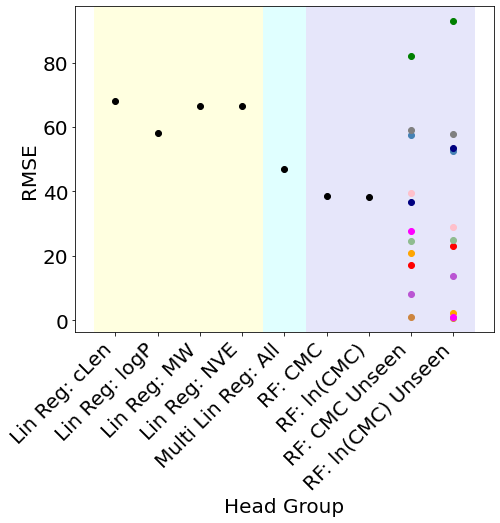

In [27]:
rf_unseen_stats_plot_compare(RMSE_cmc, RMSE_ln_cmc, RMSE_all2, model_name_all2, "RMSE", colours, 
                                 head_group, "RMSE_rf_pred_unseen_compare.png", False)

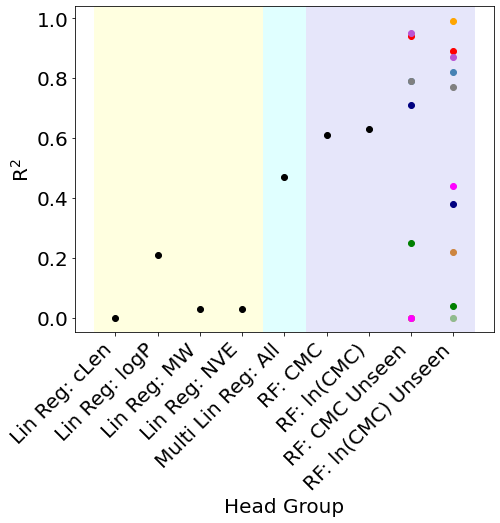

In [28]:
rf_unseen_stats_plot_compare(co_det_cmc, co_det_ln_cmc, co_det_all2, model_name_all2, "R$^{2}$", colours, 
                                 head_group, "co_det_rf_pred_unseen_compare.png", False)

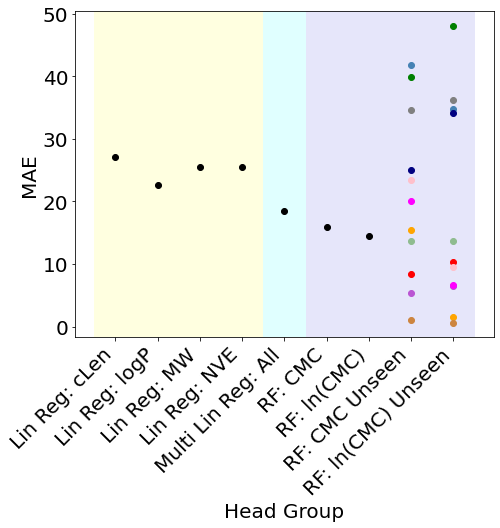

In [29]:
rf_unseen_stats_plot_compare(MAE_cmc, MAE_ln_cmc, MAE_all2, model_name_all2, "MAE", colours, 
                                 head_group, "MAE_rf_pred_unseen_compare.png", False)